## EDO orden 2

Para resolver una EDO de orden 2, habra que descomponerla en dos EDO de orden 1

### Péndulo no lineal
El desplazamiento del brazo en la posición vertical está dado en términos de $\theta$ y su dirección tangencial es $l\frac{d^2\theta}{dt^2}$.

$$
ml\frac{d^2\theta}{dt^2} = -mg sin(\theta)
$$

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l} sin(\theta)
$$

Expresando la ecuación de segundo órden como dos ecuaciones diferenciales de primer órden.

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{g}{l}sin\theta
$$

El objetivo es crear una funcion que depentda de r y t, donde r es un vector cuya primera entrada sea w y la segunda entrada dw

$$
\vec{r} = \left [ \omega, \,\,\,\,\,\,\,\frac{d\omega}{dt} \right ]
$$

El secreto sera hacer un metodo numerico sobre cada entrada, asi al finalizar el metodo, la primera entrada sera la posicion/angulo,  y la segunda entrada la velocidad


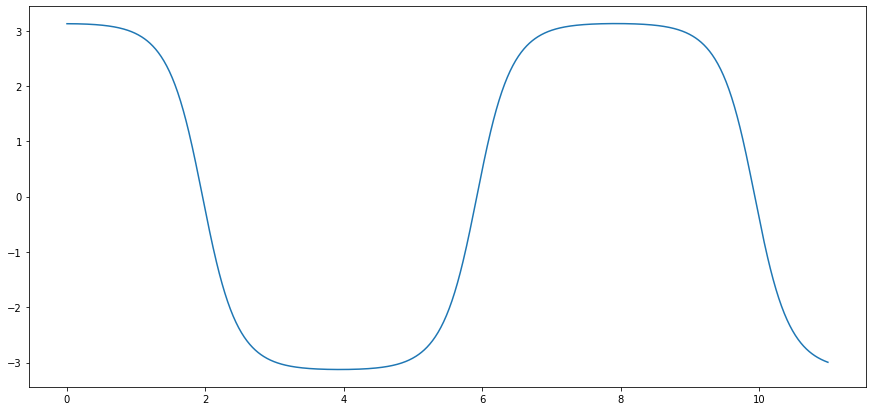

In [1]:
from pylab import *
rcParams['figure.figsize']= [15,7]

g = 9.8
L = 1

#crear funcion f(r,t)
def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta  = omega
    fomega  = -g/L * sin(theta)
    return array([ftheta, fomega], float)

#Intervalo de integracion
a = 0
b = 10
N = 1000
h = (b-a)/N

#condiciones iniciales
xi = 179/180 * pi
vi = 0

lista_t = arange(a, b+1, h)
lista_x = []  #aqui pondremos las soluciones de la posicion/angulo
lista_v = []  #aqui pondremos las soluciones de la velocidad

#De las co iniciales, tenemos las primeras soluciones
r = array([xi, vi], float)

for i in range(0,len(lista_t)):
    t = lista_t[i]
    ## agregamos las primeras soluciones a x y v
    lista_x.append(r[0])
    lista_v.append(r[1])
    #aqui pondremos el metodo iterativo de algun metodo numerico
    
    ###Euler
    #r += h*f(r,t) 
    
    ### RK2 ###
    k1 = f(r,t) 
    k2 = f(r +0.5*h*k1, t+0.5*h)
    r += h*k2
    
    ### Rk4 ###
    #k1 = h*f(r,t)
    #k2 = h*f(r +0.5*h*k1, t+0.5*h)
    #k3 = h*f(r +0.5*h*k2, t+0.5*h)
    #k4 = h*f(r+k3, t+h)
    #r += (k1+ 2*k2 + 2*k3 + k4)/6

plot(lista_t, lista_x)
#plot(lista_t, lista_x)

In [2]:
#Funcion que devuelve las soluciones de una EDO de segundo orden
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi la condicion inicial de la solucion
#vi la condicion inicial de la derivada
#h es el tamaño de paso
#metodo, es la tecnica a utilizar, de la slistadas arriba

def EDO2(f, to, tf, xi, vi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x = []
    lista_v = []
    r = array([xi,vi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_v.append(r[1])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_v)

def Euler2(f,r,t,h):
    r += h * f(r,t)
        
def RK22(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r+ 0.5*h*k1, t+0.5*h)
    r += h * k2
        
def RK42(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t+ 0.5*h)
    k4 = f(r + h*k3, t + h)
    r += h/6 * (k1 + 2*k2 + 2*k3 + k4)

In [3]:
def pendulo_nolineal(r,t):
    theta = r[0]
    omega = r[1]
    ftheta  = omega
    fomega  = -g/L * sin(theta)
    return array([ftheta, fomega], float)

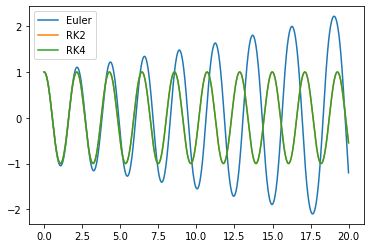

In [4]:
M1 = EDO2(pendulo_nolineal, 0, 20, L , 0, 0.01, Euler2)
M2 = EDO2(pendulo_nolineal, 0, 20, L , 0, 0.01, RK22)
M3 = EDO2(pendulo_nolineal, 0, 20, L , 0, 0.01, RK42)

plot(M1[0], M1[1], label = 'Euler')
plot(M2[0], M2[1], label = 'RK2')
plot(M3[0], M3[1], label = 'RK4')
legend()

## Sistema de Ecuaciones 
## Dos masas con dos resortes

 
 $$  m_1\ddot{\theta}_1 = - k_1\theta_1 + k_2(\theta_2 - \theta_1)   $$
 $$  m_2\ddot{\theta}_2 = - k_2(\theta_2 - \theta_1)   $$

 
 
Notemos que podemos reescribir el anterior sistema de ecuaciones de manera matricial como 


$$ \left(\begin{matrix} m_1 & 0\\ 0 & m_2\end{matrix}\right)
\left(\begin{matrix} \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{matrix}\right)
= \left(\begin{matrix} - k_1\theta_1 + k_2(\theta_2 - \theta_1) \\  
- k_2(\theta_2 - \theta_1) \end{matrix}\right)
$$


In [5]:
def Masa_resorte(r,t):
    #tomamos las posiciones y velocidades del vector r
    x1 = r[0]
    x2 = r[1]
    v1 = r[2]
    v2 = r[3]
    
    #haremos un sistema Ax = B
    
    #Elementos de la matriz A
    a11 = m1
    a12 = 0
    a21 = 0
    a22 = m2
    A = array ([[a11,a21], [a21,a22]])
    
    #elementos del vector B
    b1 = -k1*x1 + k2*(x2-x1)
    b2 = -k2*(x2-x1)
    B = array([b1,b2])
    
    #multiplicacion de matrices para obtener x
    #x tendra las segundas derivadas
    x = inv(A).dot(B)
    
    #despues de aplicar el proceso iterativo de un metodo numerico
    #el nuevo vector r tendra como r1=posicion1, r2=posicion2
    #r3= velocidad1,  r4 = velocidad2
    
    r = array([v1, v2, x[0], x[1]])
    return r

In [6]:
def EDO2_sistema(f, to, tf, x1i, x2i,  v1i, v2i, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x1 = []
    lista_x2 = []
    lista_v1 = []
    lista_v2 = []
    r = array([x1i, x2i, v1i, v2i],float)
    for t in lista_t:
        lista_x1.append(r[0])
        lista_x2.append(r[1])
        lista_v1.append(r[2])
        lista_v2.append(r[3])
        metodo(f,r,t,h)
    return (lista_t, lista_x1, lista_x2, lista_v1, lista_v2)

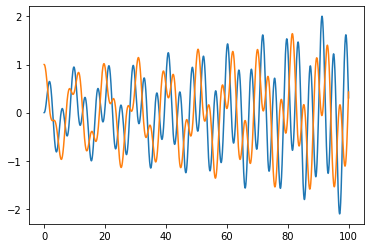

In [7]:
L = 1
g = 9.8

k1, k2 = 1, 1
m1, m2 = 1, 1
x1, x2 = 0, L
v1, v2 = 0, 0

M1 = EDO2_sistema(Masa_resorte, 0, 100, x1, x2, v1, v2, 0.01, Euler2)

plot(M1[0], M1[1])
plot(M1[0], M1[2])

Dada. la ecuacion diferencial

$$ y''(x) = - g(x) y(x) + s(x) $$

Comenzamos por hacer la serie de Taylor  de la funcion $ y(x) $, alrededor del punto $ x_0 $:

$$ y(x) = y(x_0) + (x-x_0)y'(x_0) + \frac{(x-x_0)^2}{2!}y''(x_0) + \frac{(x-x_0)^3}{3!}y'''(x_0) + \frac{(x-x_0)^4}{4!}y''''(x_0) + \frac{(x-x_0)^5}{5!}y'''''(x_0) + \mathcal{O}(h^6). $$

Si la distancia entre $ x $ y  $ x_0 $ es $ h = x - x_0 $, reordenamos la ecuacion anterior como

$$y(x_0 + h) = y(x_0) + hy'(x_0) + \frac{h^2}{2!}y''(x_0) + \frac{h^3}{3!}y'''(x_0) + \frac{h^4}{4!}y''''(x_0) + \frac{h^5}{5!}y'''''(x_0) + \mathcal{O}(h^6). $$

Para reordenar el espacio y hacerlo discreto,  necesitamos un conjunto de valores de $x$, de tal forma que entre dos valores sucesivos, exista siempre la misma distancia $h = x_{n+1} - x_n $.

De esta forma tendremos una ecuacion discreta, y ademas una relacion entre dos soluciones de la EDO $ y_n $ y $ y_{n+1} $:

$$ y_{n+1} = y_n + hy'(x_n) + \frac{h^2}{2!}y''(x_n) + \frac{h^3}{3!}y'''(x_n) + \frac{h^4}{4!}y''''(x_n) + \frac{h^5}{5!}y'''''(x_n) + \mathcal{O}(h^6). $$

Para un metodo iterativo,  necesitamos tanto pasos hacia adelante como pasos hacia atras. Si hacemos parsos hacia atras ( con tamano $-h$), obtenemos la expresion para la solucion $ y_{n-1} $:

$$ y_{n-1} = y_n - hy'(x_n) + \frac{h^2}{2!}y''(x_n) - \frac{h^3}{3!}y'''(x_n) + \frac{h^4}{4!}y''''(x_n) - \frac{h^5}{5!}y'''''(x_n) + \mathcal{O}(h^6). $$

Observemos que solo las potencias impares de $h$ cambian de signo. Si sumamos las dos ecuaciones anteriores tenemos:

$$ y_{n+1} - 2 y_n + y_{n-1} = h^2 y''_n + \frac{h^4}{12}y''''_n + \mathcal{O}(h^6). $$

Podemos solucionas esta ecuacion para $ y_{n+1} $,  si sustituimos la expresion $y''_n = - g_n y_n + s_n $.
Para obtener el factor $ y''''_n $, derivamos dos veces $ y''_n = - g_n y_n + s_n $ y lo aproximamos como en el caso anterior:

$$ y''''_n = \frac{d^2}{d x^2} (-g_n y_n + s_n), $$
$$ h^2 y''''_n = -g_{n+1} y_{n+1} + s_{n+1} + 2 g_n y_n - 2 s_n - g_{n-1} y_{n-1} + s_{n-1} + \mathcal{O}(h^4). $$

Si sustituimos estos terminos en la ecuacion anterior:


$$ y_{n+1} - 2 y_n + y_{n-1} = {h^2} (- g_n y_n + s_n) + \frac{h^2}{12} (- g_{n+1} y_{n+1} + s_{n+1} + 2 g_n y_n - 2 s_n - g_{n-1} y_{n-1} + s_{n-1}) + \mathcal{O}(h^6), $$

reordenando

$$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1} \right) - 2 y_n \left(1 - \frac{5 h^2}{12} g_n \right) + y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1} \right) = \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6). $$

y volviendo a reordenar

$$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1}\right) = 2 y_n \left(1 - \frac{5 h^2}{12} g_n\right) - y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1}\right) + \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6),$$


Si ignoramos el termino de orden <math> h^6 </math>,  entonces habremos logrado el metodo de Numerov

## Numerov

El metodo de Numerov se usa para resolver ecuaciones de la forma:

$$ \frac{d^2 y}{dx^2} = - g(x) y(x) + s(x)$$

Donde se toman 3 valores $ y_{n-1}, y_n, y_{n+1} $ usando puntos equidistantes $ x_{n-1}, x_n, x_{n+1} $. La relación entre ellos es:


$$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1}\right) = 2 y_n \left(1 - \frac{5 h^2}{12} g_n\right) - y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1}\right) + \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6),$$

Donde:

$y_n = y(x_n) $, $ g_n = g(x_n)$, $ s_n = s(x_n) $ y $ h = x_{n+1} - x_n$


En nuestro caso tenemos: 

$$\frac{d^2 u(x)}{dx^2} = -\frac{x  * u(x)}{\pi} - 4 sin(x) $$

$u(0) = 0$

$u'(0) = 1$

Por lo que $g(x) = x/\pi$   y     $s(x) = -4sin(x)$


In [8]:
def g(x):
    return x/(pi)

def s(x):
    return -4*sin(x)

In [9]:
def Numerov(gnumerov, snumerov, a, b, N, y0):
    h = (b-a)/N
    h12 = (h**2)/12
    #intervalo de tiempo
    lista_t = arange(a, b+1, h)
    #lista donde guardaremos las soluciones y
    lista_y = []

    # 0 denotara n-1
    # 1 denotara n
    # 2 denotara n+1
    g0 = gnumerov(a)
    g1 = gnumerov(a+h) 
    s0 = snumerov(a)
    s1 = snumerov(a+h)
    
    #suponer cual sera la sig solucion y1
    y1 = y0 + h/2

    #agregar las primeras dos soluciones a lista_y
    lista_y.append(y0)
    lista_y.append(y1)
    
    #metodo iterativo de Numerov
    #Comenzamos a iterar desde el tercer elemento del intervalo de tiempo
    #ya que tenemos las primeras dos soluciones
    for i in range(2, len(lista_t)):
        x = lista_t[i]
        #calculamos los n+1
        g2 = gnumerov(x)
        s2 = snumerov(x)
        #terminos para calcular y_n+1
        ca = (1 + h12*g2)
        cb = 2*y1*(1- 5*h12*g1)
        cc = y0 * (1 + h12*g0)
        cd = h12 * (s2 + 10*s1 +s0)
        y2 = (cb -cc +cd)/ca
        lista_y.append(y2)
        #actualizamos las variables
        y0 = y1
        y1 = y2
        g0 = g1
        g1 = g2
        s0 = s1
        s1 = s2
        
    return lista_t, lista_y  
            

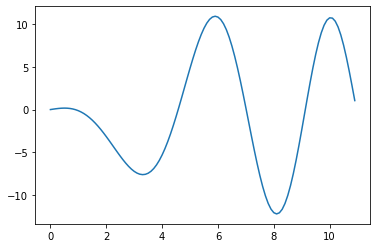

In [10]:
def g(x):
    return x/(pi)

def s(x):
    return -4*sin(x)

M = Numerov(g, s, 0, 10, 100, 0)
plot(M[0], M[1])

$$ y_{n+1} \left(1 + \frac{h^2}{12} g_{n+1}\right) = 2 y_n \left(1 - \frac{5 h^2}{12} g_n\right) - y_{n-1} \left(1 + \frac{h^2}{12} g_{n-1}\right) + \frac{h^2}{12} (s_{n+1} + 10 s_n + s_{n-1}) + \mathcal{O}(h^6),$$